# :על מה הפרוייקט שלנו
## הדאטה שלנו מכיל מידע כגון: מס' המושבות המייצרות דבש והכמות שנלקחה מהן, תפוקת הדבש למושבה, מחיר לק"ג דבש, מניות, וחומרי הדברה ניאוניים הפוגעים בדבורים 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# importing vlc module
import vlc

# importing pafy module
import pafy

# url of the video
url = "https://www.youtube.com/watch?v=FAYbMDVaAi8"

# creating pafy object of the video
video = pafy.new(url)

# getting best stream
best = video.getbest()

# creating vlc media player object
media = vlc.MediaPlayer(best.url)

# start playing video
media.play()
print('the video will run in few moments')

FileNotFoundError: Could not find module 'C:\Users\YaelD\OneDrive\מסמכים\שנה א\סמסטר קיץ\מבוא לניתוח נתונים\פרוייקט\libvlc.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [6]:
url = 'https://raw.githubusercontent.com/YaelYael123/Project_HoneyNeonic/main/vHoneyNeonic_v03.csv'
HoneyNeonic = pd.read_csv(url)
HoneyNeonic.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN


## טיפול בערכים חסרים

In [7]:
HoneyNeonic.dtypes

state             object
numcol           float64
yieldpercol        int64
totalprod        float64
stocks           float64
priceperlb       float64
prodvalue        float64
year               int64
StateName         object
Region            object
FIPS               int64
nCLOTHIANIDIN    float64
nIMIDACLOPRID    float64
nTHIAMETHOXAM    float64
nACETAMIPRID     float64
nTHIACLOPRID     float64
nAllNeonic       float64
dtype: object

In [8]:
HoneyNeonic.isnull().sum().sort_values(ascending=False)

nAllNeonic       237
nTHIACLOPRID     237
nACETAMIPRID     237
nTHIAMETHOXAM    237
nIMIDACLOPRID    237
nCLOTHIANIDIN    237
Region             0
FIPS               0
state              0
numcol             0
year               0
prodvalue          0
priceperlb         0
stocks             0
totalprod          0
yieldpercol        0
StateName          0
dtype: int64

In [9]:
HoneyNeonic = HoneyNeonic.fillna(0)

In [10]:
HoneyNeonic.isnull().sum().sort_values(ascending=False)

state            0
Region           0
nTHIACLOPRID     0
nACETAMIPRID     0
nTHIAMETHOXAM    0
nIMIDACLOPRID    0
nCLOTHIANIDIN    0
FIPS             0
StateName        0
numcol           0
year             0
prodvalue        0
priceperlb       0
stocks           0
totalprod        0
yieldpercol      0
nAllNeonic       0
dtype: int64

In [11]:
object_columns = HoneyNeonic.select_dtypes(['object']).columns
object_columns

Index(['state', 'StateName', 'Region'], dtype='object')

In [12]:
for column in object_columns: 
    HoneyNeonic[column] = HoneyNeonic[column].astype('category')
HoneyNeonic.dtypes

state            category
numcol            float64
yieldpercol         int64
totalprod         float64
stocks            float64
priceperlb        float64
prodvalue         float64
year                int64
StateName        category
Region           category
FIPS                int64
nCLOTHIANIDIN     float64
nIMIDACLOPRID     float64
nTHIAMETHOXAM     float64
nACETAMIPRID      float64
nTHIACLOPRID      float64
nAllNeonic        float64
dtype: object

## הבנת הדאטה

In [13]:
HoneyNeonic['post-neonics(2003)'] = np.where(HoneyNeonic['year']>=2003, 1, 0)

In [14]:
continuous_columns = HoneyNeonic[['numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue','year','nCLOTHIANIDIN','nIMIDACLOPRID','nTHIAMETHOXAM','nACETAMIPRID','nTHIACLOPRID','nAllNeonic','post-neonics(2003)']].columns

In [15]:
corr = HoneyNeonic[continuous_columns].corr()

In [16]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'numcol'),
  Text(1.5, 0, 'yieldpercol'),
  Text(2.5, 0, 'totalprod'),
  Text(3.5, 0, 'stocks'),
  Text(4.5, 0, 'priceperlb'),
  Text(5.5, 0, 'prodvalue'),
  Text(6.5, 0, 'year'),
  Text(7.5, 0, 'nCLOTHIANIDIN'),
  Text(8.5, 0, 'nIMIDACLOPRID'),
  Text(9.5, 0, 'nTHIAMETHOXAM'),
  Text(10.5, 0, 'nACETAMIPRID'),
  Text(11.5, 0, 'nTHIACLOPRID'),
  Text(12.5, 0, 'nAllNeonic'),
  Text(13.5, 0, 'post-neonics(2003)')])

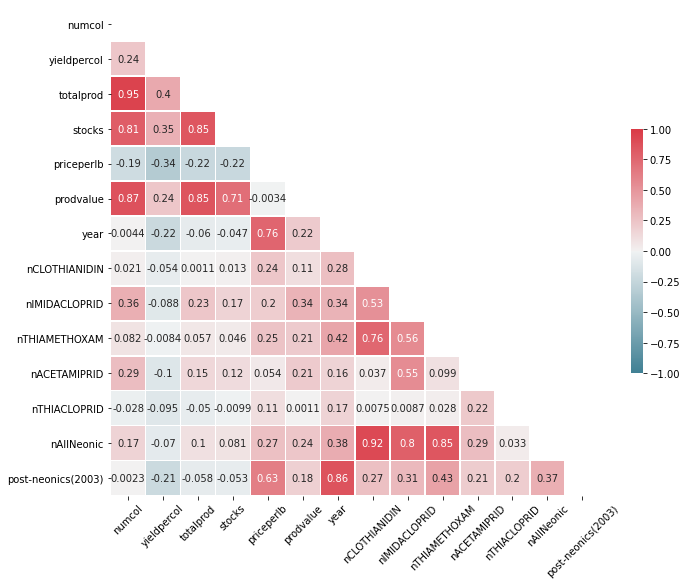

In [17]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='year', ylabel='priceperlb'>

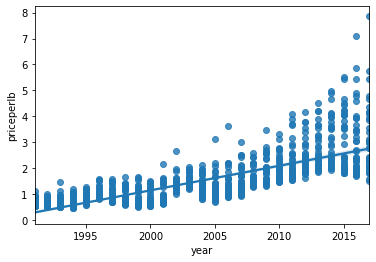

In [18]:
sns.regplot(x='year', y='priceperlb', data=HoneyNeonic)

### ניתן לראות שעם השנים עולה מחיר הדבש ובנוסף יש גם יותר חריגויות במחיר שלו

In [24]:
# plt.figure(figsize=(15,15))
# sns.boxplot(x='year', y='priceperlb', data=HoneyNeonic)

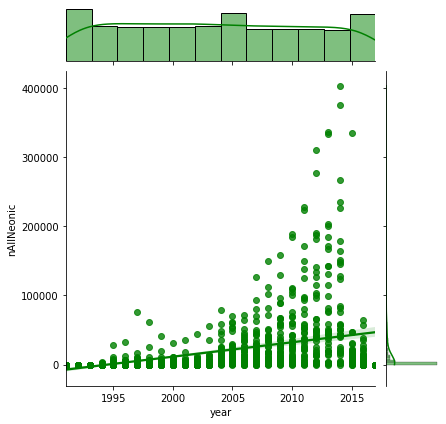

In [29]:
sns.jointplot(data=HoneyNeonic, x='year', y='nAllNeonic', kind='reg', color='g')

In [31]:
HoneyNeonic_pre_2003 = HoneyNeonic[(HoneyNeonic['year']<2003)]
HoneyNeonic_2003 = HoneyNeonic[(HoneyNeonic['year']>=2003)]

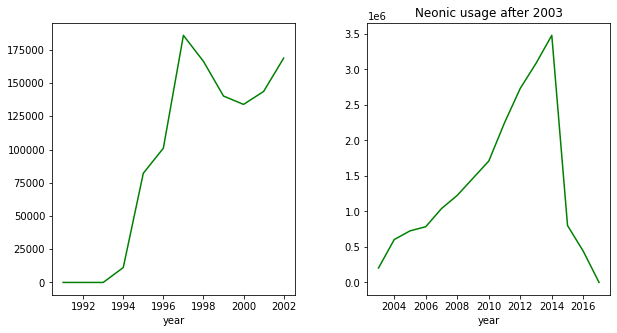

In [45]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
plt.subplots_adjust(wspace = 0.3)
HoneyNeonic_pre_2003.groupby(['year'])['nAllNeonic'].sum().plot(color='green', ax=ax[0])
plt.title("Neonic usage prior to 2003")
HoneyNeonic_2003.groupby(['year'])['nAllNeonic'].sum().plot(color='green', ax=ax[1])
plt.title("Neonic usage after 2003")
plt.show()

# הידעת
דבש פרחי בר - מכיל ויטמינים ומינרלים רבים, מאחר שהוא נאסף מזנים שונים של צמחים. צבעו נע בין צהוב-זהב לחום כהה, תלוי בהרכב הצמחים שבו.

דבש אקליפטוס - דבש שצבעו כהה, בעל תכונות אנטי-בקטריאליות ואנטי-זיהומיות. הוא טוב בעיקר לטיפול בבעיות בדרכי הנשימה, בשיעול ובדלקות עור ופה. בדבש אקליפטוס יש ברזל בכמות רבה.

דבש הדרים - דבש עדין במרקמו ובטעמו. צבעו צהבהב והוא מומלץ לבישול ולאפייה. דבש מסוג זה אינו קיים בצורה אורגנית (במדינת ישראל מרססים את כל הפרדסים, ללא יוצא מן הכלל). הוא עוזר להפרעות עיכול ומונע עצירות.

דבש אבוקדו - בעל צבע כהה מאוד ומרקם מאוד סמיך. דבש זה בעל טעם עשיר ומרוכז. הוא מומלץ לבעיות לב ולמחלות מפרקים.

דבש תלתן - מומלץ לטיפול בבעיות בדרכי השתן, בבעיות גינקולוגיות ולטיפול בהזעת יתר.
לאיחוי פצעים, לסינוסיטיס ולטיפול בעצירות.